# Model Building
Here, using the cleaned data different NLP techniques will be used to convert the unstructured data into a structured format that can be used to train different machine learning models.

Different models will be trained and the one that gives the best result will be finalized

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft Developer,anubhav kumar singh core competencies scriptin...
1,PeopleSoft Developer,ananda rayudu profile summary years experience...
2,PeopleSoft Developer,peoplesoft database administrator gangareddy p...
3,PeopleSoft Developer,classification internal classification interna...
4,PeopleSoft Developer,priyanka ramadoss mountpleasant coonoor nilgir...


### Encoding the category column

In [3]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["Category_Code"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,Category_Code
0,PeopleSoft Developer,anubhav kumar singh core competencies scriptin...,0
1,PeopleSoft Developer,ananda rayudu profile summary years experience...,0
2,PeopleSoft Developer,peoplesoft database administrator gangareddy p...,0
3,PeopleSoft Developer,classification internal classification interna...,0
4,PeopleSoft Developer,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
73,Work_Day Developer,workday integration consultant name sri krishn...,3
74,Work_Day Developer,srikanth workday hcm consultant seeking suitab...,3
75,Work_Day Developer,workday hcm fcm name kumar role workday consul...,3
76,Work_Day Developer,venkateswarlu workday consultant professional ...,3


In [4]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
Category_Code     0
dtype: int64

### Splitting into independent and dependent variables

In [5]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

### Splitting into train and test sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape

((62,), (16,))

### Converting the text column into a vectorized format

In [7]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [8]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [9]:
x_train.shape, x_test.shape

((62, 3834), (16, 3834))

In [10]:
print(y_train),print(y_test)

['Work_Day Developer' 'PeopleSoft Developer' 'React JS Developer'
 'React JS Developer' 'SQL Developer' 'PeopleSoft Developer'
 'Work_Day Developer' 'PeopleSoft Developer' 'SQL Developer'
 'Work_Day Developer' 'React JS Developer' 'Work_Day Developer'
 'Work_Day Developer' 'React JS Developer' 'SQL Developer'
 'PeopleSoft Developer' 'PeopleSoft Developer' 'React JS Developer'
 'Work_Day Developer' 'React JS Developer' 'SQL Developer' 'SQL Developer'
 'Work_Day Developer' 'PeopleSoft Developer' 'SQL Developer'
 'React JS Developer' 'PeopleSoft Developer' 'Work_Day Developer'
 'PeopleSoft Developer' 'React JS Developer' 'PeopleSoft Developer'
 'Work_Day Developer' 'Work_Day Developer' 'Work_Day Developer'
 'Work_Day Developer' 'Work_Day Developer' 'PeopleSoft Developer'
 'PeopleSoft Developer' 'Work_Day Developer' 'PeopleSoft Developer'
 'Work_Day Developer' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'SQL Dev

(None, None)

## KNN Classifer

In [11]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.62
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                      precision    recall  f1-score   support

PeopleSoft Developer       1.00      0.25      0.40         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       0.00      0.00      0.00         3
  Work_Day Developer       0.40      1.00      0.57         4

            accuracy                           0.62        16
           macro avg       0.60      0.56      0.49        16
        weighted avg       0.66      0.62      0.56        16




## Decision Tree Classifier

In [12]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.94
Classification report for classifier DecisionTreeClassifier():
                      precision    recall  f1-score   support

PeopleSoft Developer       0.80      1.00      0.89         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      0.75      0.86         4

            accuracy                           0.94        16
           macro avg       0.95      0.94      0.94        16
        weighted avg       0.95      0.94      0.94        16




## Random Forest Classifier

In [13]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                      precision    recall  f1-score   support

PeopleSoft Developer       1.00      1.00      1.00         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      1.00      1.00         4

            accuracy                           1.00        16
           macro avg       1.00      1.00      1.00        16
        weighted avg       1.00      1.00      1.00        16




## SVM Classifier

In [14]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
                      precision    recall  f1-score   support

PeopleSoft Developer       1.00      1.00      1.00         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      1.00      1.00         4

            accuracy                           1.00        16
           macro avg       1.00      1.00      1.00        16
        weighted avg       1.00      1.00      1.00        16




## Logistic Regression

In [15]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                      precision    recall  f1-score   support

PeopleSoft Developer       1.00      1.00      1.00         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      1.00      1.00         4

            accuracy                           1.00        16
           macro avg       1.00      1.00      1.00        16
        weighted avg       1.00      1.00      1.00        16




## Bagging Classifier

In [16]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                      precision    recall  f1-score   support

PeopleSoft Developer       1.00      1.00      1.00         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      1.00      1.00         4

            accuracy                           1.00        16
           macro avg       1.00      1.00      1.00        16
        weighted avg       1.00      1.00      1.00        16




## AdaBoost Classifier

In [17]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.73
Accuracy of  test set    : 0.62
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                      precision    recall  f1-score   support

PeopleSoft Developer       0.40      1.00      0.57         4
  React JS Developer       0.00      0.00      0.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      0.75      0.86         4

            accuracy                           0.62        16
           macro avg       0.60      0.69      0.61        16
        weighted avg       0.54      0.62      0.54        16




## Gradient Boost Classifier

In [18]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(max_depth=1, random_state=0):
                      precision    recall  f1-score   support

PeopleSoft Developer       1.00      1.00      1.00         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      1.00      1.00         4

            accuracy                           1.00        16
           macro avg       1.00      1.00      1.00        16
        weighted avg       1.00      1.00      1.00        16




## Naive Bayes Classifier

In [19]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                      precision    recall  f1-score   support

PeopleSoft Developer       1.00      1.00      1.00         4
  React JS Developer       1.00      1.00      1.00         5
       SQL Developer       1.00      1.00      1.00         3
  Work_Day Developer       1.00      1.00      1.00         4

            accuracy                           1.00        16
           macro avg       1.00      1.00      1.00        16
        weighted avg       1.00      1.00      1.00        16




In [20]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.693548,0.62,0.60,0.56,0.49
1,DecisionTree Classifier,1.000000,0.94,0.95,0.94,0.94
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,1.00,1.00,1.00,1.00
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.967742,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.725806,0.62,0.60,0.69,0.61
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [21]:
table.sort_values(by = ['Train_Accuracy(%)', 'Test_Accuracy(%)'], ascending=False)

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,1.00,1.00,1.00,1.00
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00
1,DecisionTree Classifier,1.000000,0.94,0.95,0.94,0.94
5,Bagging Classifier,0.967742,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.725806,0.62,0.60,0.69,0.61
0,KNN Classifier,0.693548,0.62,0.60,0.56,0.49


In [22]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

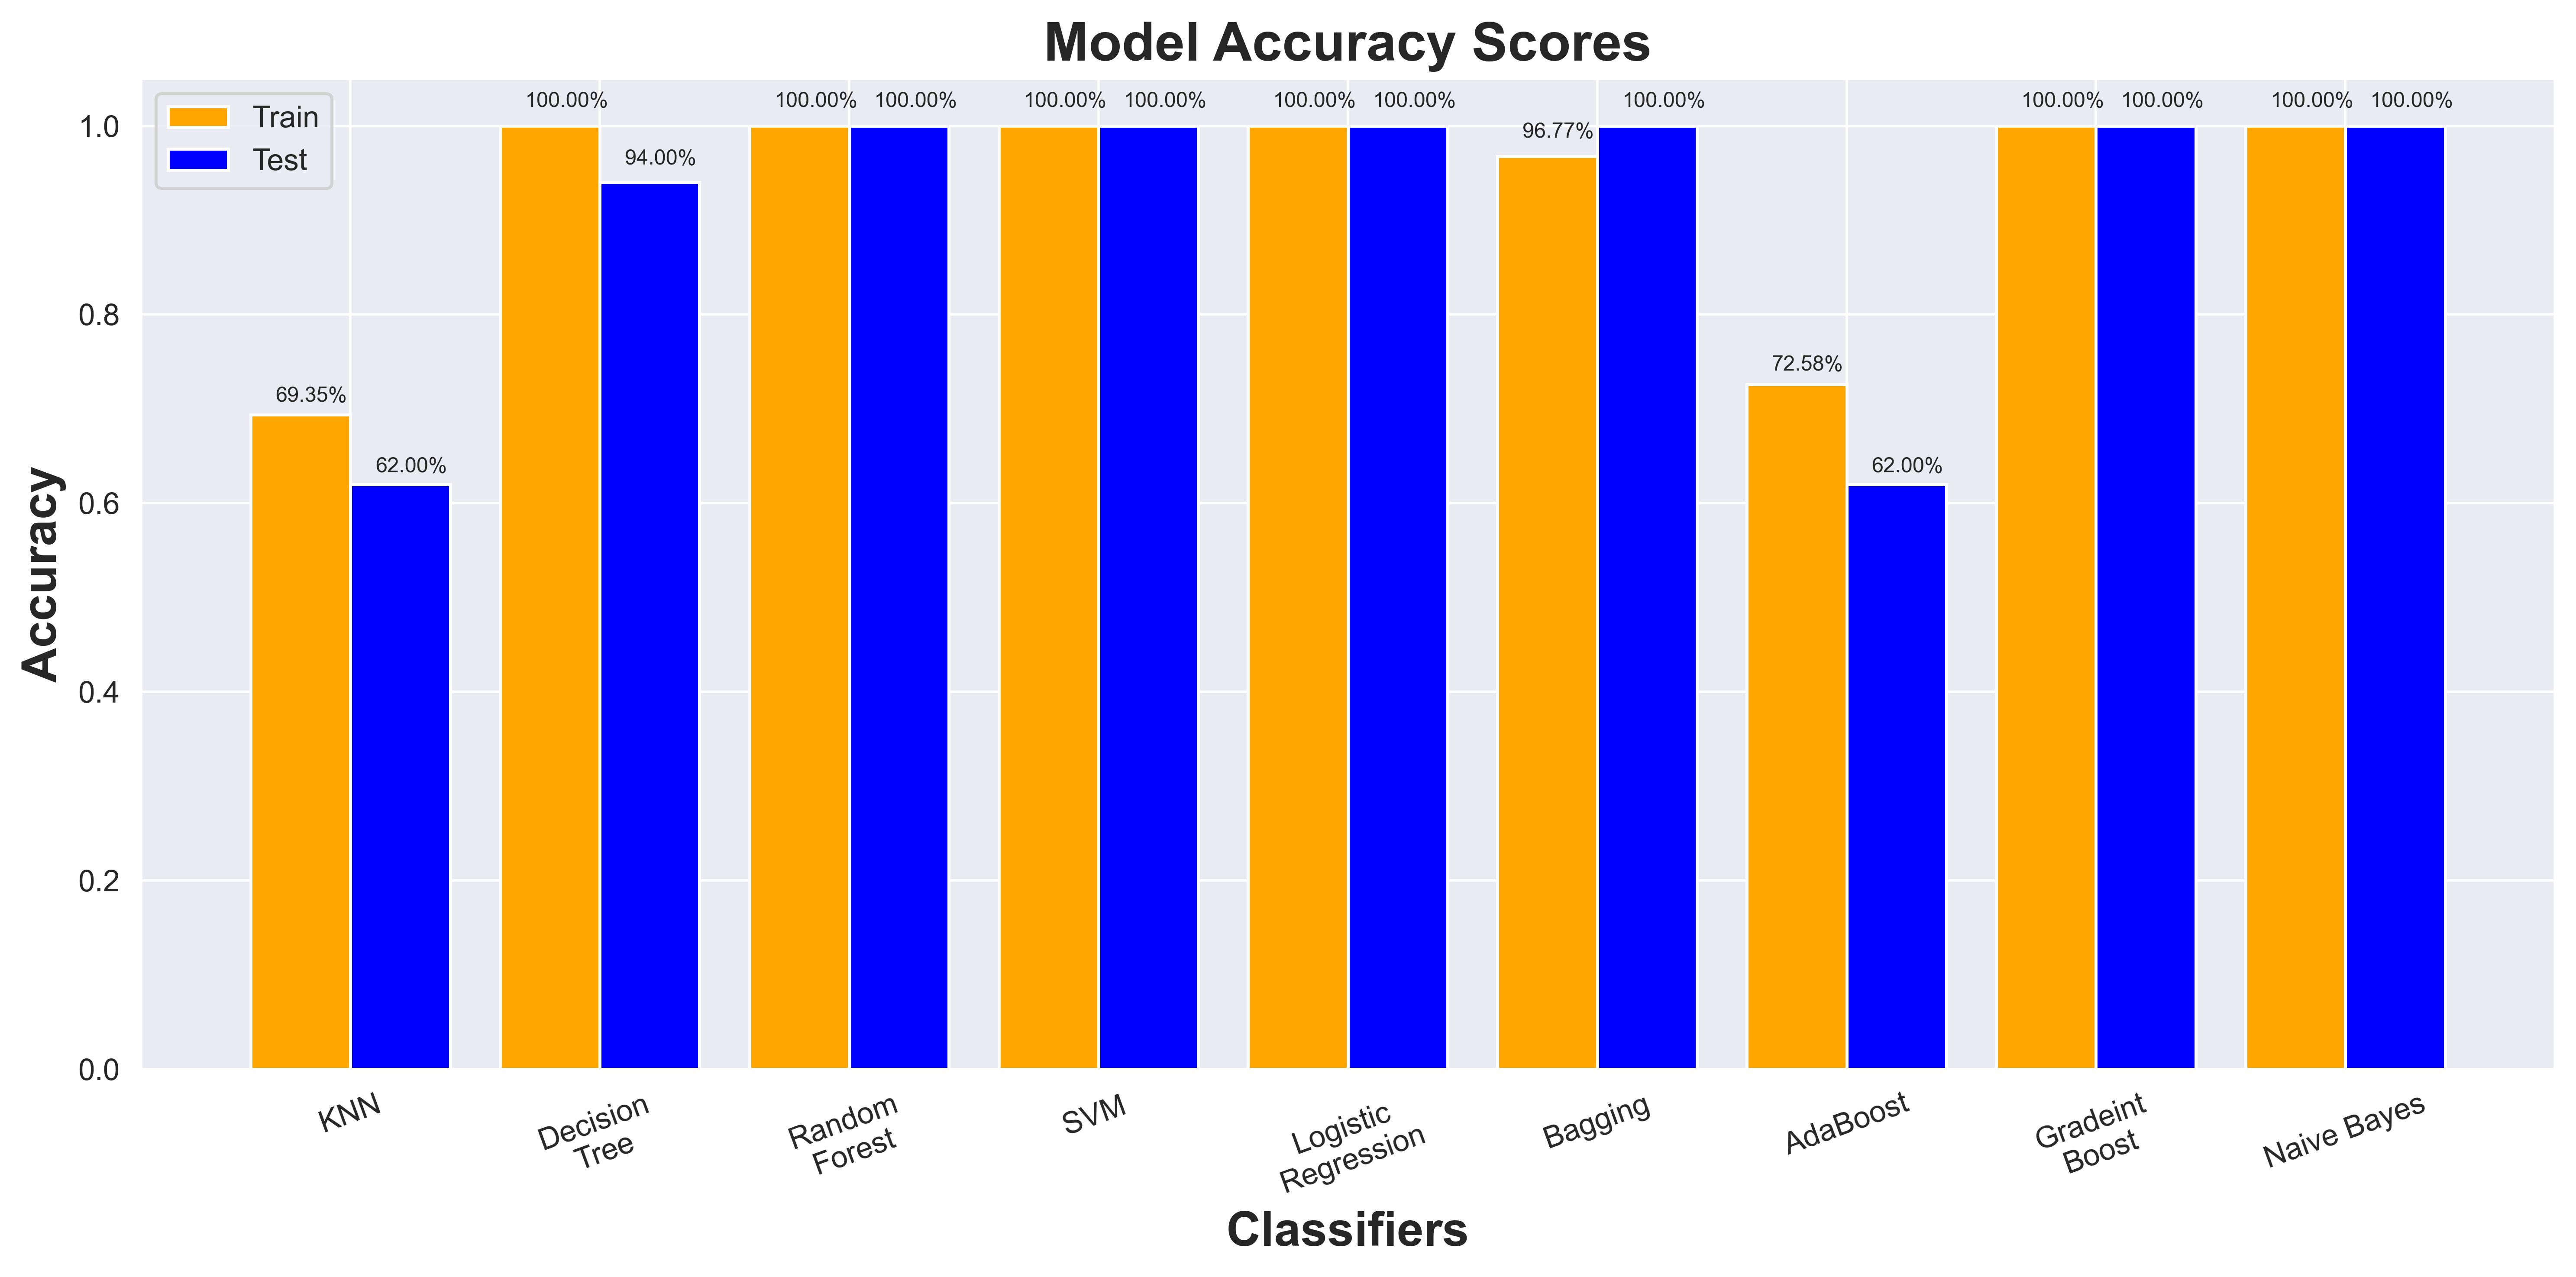

In [23]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision\nTree", "Random\nForest", "SVM ", "Logistic\nRegression", "Bagging", "AdaBoost", "Gradeint\nBoost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 20)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

-------------

From the above results it can be seen that the Decision Tree, Random Forest, SVM, Logistic, Bagging, Gradient Boost, and Naive Bayes has achieved the 100% Score mark. So, one model among these can be chosen as a final model.

As the Naive Bayes is particularly used for NLP applications and since it also achieved a 100% mark here, this model shall be used for building the application.

In [24]:
import pickle
filename = 'model_NB.pkl'
pickle.dump(model_NB,open(filename,'wb'))
pickle.dump(model_DT,open('model_DT.sav','wb'))

In [25]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))

In [26]:
pickle.dump(model_RF,open('model_RF.sav','wb'))

In [27]:
import nltk

In [28]:
nltk.__version__

'3.7'